In [1]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


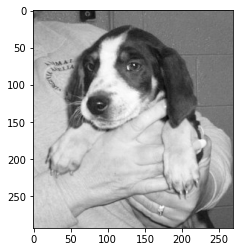

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "/content/pet"

CATEGORIES = ["dog", "cat"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [8]:
print(img_array)

[[122 111 105 ... 121 123 123]
 [126 117 115 ... 120 122 122]
 [122 114 114 ... 124 123 119]
 ...
 [190 189 197 ...  95  94  94]
 [188 188 191 ...  95  94  94]
 [190 190 191 ...  96  93  91]]


In [9]:
print(img_array.shape)

(293, 269)


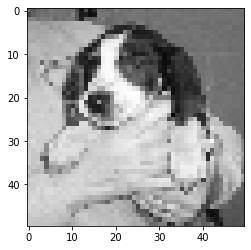

In [10]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

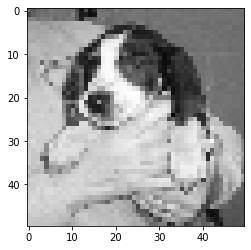

In [11]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [12]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 20/20 [00:00<00:00, 862.08it/s]

40


In [13]:
import random

random.shuffle(training_data)

In [14]:
for sample in training_data[:10]:
    print(sample[1])

0
1
1
0
0
0
0
0
1
1


In [15]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[221]
   [201]
   [191]
   ...
   [161]
   [147]
   [156]]

  [[218]
   [208]
   [192]
   ...
   [122]
   [171]
   [148]]

  [[218]
   [209]
   [213]
   ...
   [174]
   [174]
   [151]]

  ...

  [[173]
   [172]
   [168]
   ...
   [174]
   [174]
   [168]]

  [[166]
   [168]
   [167]
   ...
   [171]
   [171]
   [169]]

  [[164]
   [171]
   [166]
   ...
   [170]
   [166]
   [170]]]]


In [17]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [ ]:
X